In [1]:
import os
import scipy.io.wavfile as wf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def time_shift(indata,dt,delay):
    n=int(delay/dt); dtt=delay-n*dt
    buffer_size = len(indata) - abs(n)
    # dt-deltaT 만큼 옮길때(T)
    od=np.array([]);sp=np.array([]);spp=np.array([])
    if dtt>=0:
        
        if n == 0:
            od=np.array(indata)
            sp=np.array(indata)
        else :
            od=np.array(indata[n:])
            sp=np.array(indata[0:buffer_size])            
        
        for i in range(buffer_size):
            if i == 0:
                m = (sp[i+1] - sp[i]) / dt
                spp=np.append(spp,-m*dtt+sp[i])
            else:
                mp = (sp[i] - sp[i-1]) / dt
                spp=np.append(spp,mp*(dt-dtt)+sp[i-1])
    else:
        
        if n == 0:
            od=np.array(indata[:-1])
            sp=np.array(indata)
        else :
            od=np.array(indata[0:buffer_size-1])
            sp=np.array(indata[abs(n):])#-1-1:-1])
            #print(len(od),'####',len(sp))
        
        
        for i in range(buffer_size):
#            print(i)
#            print(n)
            if i == buffer_size-1:
                break
            else:
                mp = (sp[i+1] - sp[i]) / dt
                spp=np.append(spp,mp*abs(dtt)+sp[i])
    return od,spp


def delay_time(dd):
    dt=[]
    d = dd*0.01 #m/cm
    v = 340 #m/s
    rad = np.pi/180
    for i in range(36):
        delta=d*np.cos(i*10*rad)/v
        dt.append(delta)
        
    return dt
####
#

#normalize a single array
def norm(inp):
    M = np.amax(np.absolute(inp))
    return inp/M

#pad as same lengh for every chunk
def pad(pran,inp):
    if len(inp) < pran:
        for i in range(pran//len(inp)):
            inp=np.append(inp,inp)
#         p = pran%len(inp)
#         z = inp[:p]
#         return np.append(inp,z)
        return inp[:pran]
    else:
        return inp

#
def add_data(in1,in2,in3,r=1):#,in4=[],in5=[],r=1):
    a=max([len(in1),len(in2),len(in3)])
    in1 = pad(a,in1)
    in2 = pad(a,in2)
    in3 = pad(a,in3)
#     in4 = pad(a,in4)
#     in5 = pad(a,in5)
    
    noise = norm(in1+in2+in3) * r

    return noise   

def add_data4(in1,in2,in3,in4=[],r=1):
    a=max([len(in1),len(in2),len(in3),len(in4)])
    in1 = pad(a,in1)
    in2 = pad(a,in2)
    in3 = pad(a,in3)
    in4 = pad(a,in4)
    
    noise = norm(in1+in2+in3+in4) * r

    return noise   

def add_data2(in1,in2,r=1):#,in4=[],in5=[],r=1):
    if len(in1)<len(in2):
        a=len(in1)
        in2 = in2[:a]
    else:
        a=len(in1)
        in2 = pad(a,in2)
    
    noise = norm(in1+in2) * r

    return noise   
def mic_sp(inp):
    M1,M2=[],[]
    for i in inp:
        if 'mic1' in i :
            M1.append(i)
        elif 'mic2' in i:
            M2.append(i)
    return M1,M2

def zeros(inp):
    th = str(inp//1000)
    th_ = inp%1000
    
    hd = str(th_//100)
    hd_ = th_%100
    
    t = str(hd_//10)
    t_ = hd_%10
    
    o = str(t_)
    
    return th+hd+t+o
    
#
####

824
824
824


(array([148., 146., 122., 134., 129., 145., 135., 109., 132., 165., 144.,
        139., 157., 128., 120., 131., 139., 149.]),
 array([ 0.        ,  0.94444444,  1.88888889,  2.83333333,  3.77777778,
         4.72222222,  5.66666667,  6.61111111,  7.55555556,  8.5       ,
         9.44444444, 10.38888889, 11.33333333, 12.27777778, 13.22222222,
        14.16666667, 15.11111111, 16.05555556, 17.        ]),
 <a list of 18 Patch objects>)

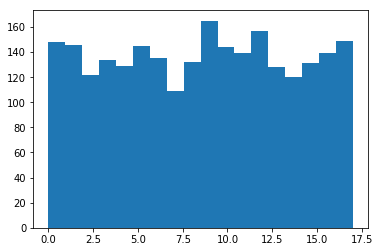

In [3]:
noise_names = os.listdir('./test_noise_set_16k')
LD = os.listdir('./clean_testset_wav_16k')

if len(LD) != len(noise_names):
    print('warnning')
print(len(noise_names))
print(len(LD))
    
I = []
II=[]
t = True
while t:
    i1 = random.randrange(0,6)
    i2 = random.randrange(6,12)
    i3 = random.randrange(12,18)
      
    k = [i1,i2,i3]

    I.append(k)
    II.append(i1)
    II.append(i2)
    II.append(i3)
    if len(I) == len(LD):
        t = False
print(len(I))

plt.hist(II,18)

In [4]:
indx = 0
for f_name in noise_names:
    
    SR,clean_wav = wf.read('./clean_testset_wav_16k/%s'%(f_name))
    SR,noisy_wav = wf.read('./test_noise_set_16k/%s'%(f_name))
    if SR != 16000:
        print(f_name)
        
    direction1,direction2,direction3 = I[indx]
    if direction1 >= 9:
        direction1 = direction1+1
    if direction2 >= 9:
        direction2 = direction2+1
    if direction3 >= 9:
        direction3 = direction3+1
    indx = indx+1
    
    dt = delay_time(1)#cm
    NR_1,NL_1 = time_shift(noisy_wav,1/SR,dt[direction1])
    NR_2,NL_2 = time_shift(noisy_wav,1/SR,dt[direction2])
    NR_3,NL_3 = time_shift(noisy_wav,1/SR,dt[direction3])
    
    MicR = add_data4(clean_wav,NR_1,NR_2,NR_3)
    MicL = add_data4(clean_wav,NL_1,NL_2,NL_3)
    clean_wav = norm(clean_wav)
    if len(MicR) != len(MicL):
        raise ValueError
    if len(MicR) != len(clean_wav):
        raise ValueError

        
    wf.write('./DSEnet_test_DATA_1cm/MICR/%s'%f_name,SR,MicR)
    wf.write('./DSEnet_test_DATA_1cm/MICL/%s'%f_name,SR,MicL)
    wf.write('./DSEnet_test_DATA_1cm/LookD/%s'%f_name,SR,clean_wav)
    
#     wav=[]
#     for ii in range(len(MicR)):
#         wav.append([MicR[ii],MicL[ii]])
#     wf.write('./DSEnet_test_DATA_1cm/stereo/%s'%f_name,SR,np.array(wav))
    
    
    

11572
11572
11572


(array([1919., 1870., 1985., 1947., 1962., 1889., 1911., 1989., 1907.,
        1934., 1864., 1967., 1910., 1957., 1912., 1888., 2003., 1902.]),
 array([ 0.        ,  0.94444444,  1.88888889,  2.83333333,  3.77777778,
         4.72222222,  5.66666667,  6.61111111,  7.55555556,  8.5       ,
         9.44444444, 10.38888889, 11.33333333, 12.27777778, 13.22222222,
        14.16666667, 15.11111111, 16.05555556, 17.        ]),
 <a list of 18 Patch objects>)

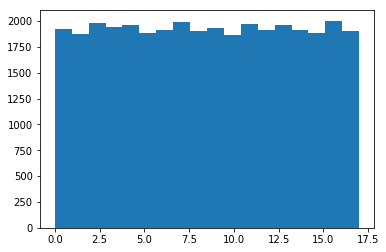

In [5]:
noise_names = os.listdir('./train_noise_set_16k')
LD = os.listdir('./clean_trainset_wav_16k')

if len(LD) != len(noise_names):
    print('warnning')
print(len(noise_names))
print(len(LD))
    
I = []
II=[]
t = True
while t:
    i1 = random.randrange(0,6)
    i2 = random.randrange(6,12)
    i3 = random.randrange(12,18)
      
    k = [i1,i2,i3]

    I.append(k)
    II.append(i1)
    II.append(i2)
    II.append(i3)
    
    if len(I) == len(LD):
        t = False
print(len(I))
plt.hist(II,18)

In [7]:
indx = 0
for f_name in noise_names:
    
    SR,clean_wav = wf.read('./clean_trainset_wav_16k/%s'%(f_name))
    SR,noisy_wav = wf.read('./train_noise_set_16k/%s'%(f_name))
    if SR != 16000:
        print(f_name)
        
    direction1,direction2,direction3 = I[indx]
    if direction1 >= 9:
        direction1 = direction1+1
    if direction2 >= 9:
        direction2 = direction2+1
    if direction3 >= 9:
        direction3 = direction3+1
    indx = indx+1
    
    dt = delay_time(1)#cm
    NR_1,NL_1 = time_shift(noisy_wav,1/SR,dt[direction1])
    NR_2,NL_2 = time_shift(noisy_wav,1/SR,dt[direction2])
    NR_3,NL_3 = time_shift(noisy_wav,1/SR,dt[direction3])
    
    MicR = add_data4(clean_wav,NR_1,NR_2,NR_3)
    MicL = add_data4(clean_wav,NL_1,NL_2,NL_3)
    clean_wav = norm(clean_wav)
    if len(MicR) != len(MicL):
        raise ValueError
    if len(MicR) != len(clean_wav):
        raise ValueError

        
    wf.write('./DSEnet_train_DATA_1cm/MICR/%s'%f_name,SR,MicR)
    wf.write('./DSEnet_train_DATA_1cm/MICL/%s'%f_name,SR,MicL)
    wf.write('./DSEnet_train_DATA_1cm/LookD/%s'%f_name,SR,clean_wav)
    
#     wav=[]
#     for ii in range(len(MicR)):
#         wav.append([MicR[ii],MicL[ii]])
#     wf.write('./DSEnet_train_DATA_1cm/stereo/%s'%f_name,SR,np.array(wav))
    
    
    

/home/psh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in short_scalars
/home/psh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in short_scalars
